## Plot a specific contour of bottom concentration for selected runs

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

import matplotlib.cm as cm

import matplotlib as mpl

from math import *

from mpl_toolkits.mplot3d.axes3d import Axes3D

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns


In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import savitzky_golay as sg

In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [5]:
#Base case, iso =1 , No 3d diff.
#CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

NoCCanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'
NoCCanyonGridOut = Dataset(NoCCanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

# Base case
Ptracer='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/ptracersGlob.nc'
PtracerOut = Dataset(Ptracer)

Ptracer07='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/ptracersGlob.nc'
PtracerOut07 = Dataset(Ptracer07)

# High Kv everywhere
Ptracer12='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run12/ptracersGlob.nc'
PtracerOut12 = Dataset(Ptracer12)

Ptracer25='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run25/ptracersGlob.nc'
PtracerOut25 = Dataset(Ptracer25)

# High kv in low kv out
Ptracer3D04='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run04/ptracersGlob.nc'
PtracerOut3D04 = Dataset(Ptracer3D04)

Ptracer30='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run30/ptracersGlob.nc'
PtracerOut30 = Dataset(Ptracer30)

# High kv in
Ptracer3D06='/ocean/kramosmu/MITgcm/TracerExperiments/3DDIFF/run06/ptracersGlob.nc'
PtracerOut3D06 = Dataset(Ptracer3D06)

# High N
Ptracer15='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run15/ptracersGlob.nc'
PtracerOut15 = Dataset(Ptracer15)

Ptracer27='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run27/ptracersGlob.nc'
PtracerOut27 = Dataset(Ptracer27)

# Low N
Ptracer16='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run16/ptracersGlob.nc'
PtracerOut16 = Dataset(Ptracer16)

Ptracer28='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run28/ptracersGlob.nc'
PtracerOut28 = Dataset(Ptracer28)

# Low f
Ptracer19='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run19/ptracersGlob.nc'
PtracerOut19 = Dataset(Ptracer19)

Ptracer23='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run23/ptracersGlob.nc'
PtracerOut23 = Dataset(Ptracer23)



In [6]:
#Base case, iso =1 , No 3d diff.
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
#CanyonGrid='/Users/Karina/Research/PhD/Tracers/TemporaryData/CNTDIFF/run03/gridGlob.nc'

CanyonGridOut = Dataset(CanyonGrid)
#NoCCanyonGrid='/Users/Karina/Research/PhD/Tracers/TemporaryData/CNTDIFF/run07/gridGlob.nc'
NoCCanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc'

NoCCanyonGridOut = Dataset(NoCCanyonGrid)

CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)


In [16]:
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc = CanyonGridOut.variables['RC']
bathy = rout.getField(CanyonGrid, 'Depth')
bathyNoC = rout.getField(NoCCanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

hFacCNoC = rout.getField(NoCCanyonGrid, 'HFacC')
MaskCNoC = rout.getMask(NoCCanyonGrid, 'HFacC')
rANoC = rout.getField(NoCCanyonGrid, 'rA')
rA = rout.getField(CanyonGrid, 'rA')

z = CanyonStateOut.variables['Z']

time = CanyonStateOut.variables['T']

In [30]:
Tr03 = rout.getField(Ptracer,'Tr1') # 
Tr07 = rout.getField(Ptracer07,'Tr1') # 

In [31]:
Tr12 = rout.getField(Ptracer12,'Tr3') # 
Tr25 = rout.getField(Ptracer25,'Tr1') # 

In [32]:
Tr16 = rout.getField(Ptracer16,'Tr1') # 
Tr28 = rout.getField(Ptracer28,'Tr1') # 

In [33]:
Tr15 = rout.getField(Ptracer15,'Tr1') # 
Tr27 = rout.getField(Ptracer27,'Tr1') # 

In [34]:
Tr19 = rout.getField(Ptracer19,'Tr1') # 
Tr23 = rout.getField(Ptracer23,'Tr1') # 

In [12]:
Tr3D06 = rout.getField(Ptracer3D06,'Tr1') # 

In [35]:
Tr3D04 = rout.getField(Ptracer3D04,'Tr1') # 
Tr30 = rout.getField(Ptracer30,'Tr1') # 

In [14]:
def mask2DCanyon(bathy, sbdepth=-152.5):
    '''Mask out the canyon from the shelf.
    bathy : depths 2D array from the grid file
    sbdepth: shelf depth, always negative float 
    Returns mask'''
    
    bathyMasked = np.ma.masked_less(-bathy, -152.5)
    return(bathyMasked.mask)

def ConcArea(Tr, hfac, ra, bathy, sbdepth=-152.5):
    '''Tr: tracer field (nt,nz,ny,nx)
       hfac: fraction of open cell at center (nz,ny,nx)
       ra: array of cell horizontal areas (ny,nx)
       bathy : depths 2D array from the grid file (ny,nx)
       sbdepth: shelf break depth (negative value)
       
       RETURNS:
       ConcArea = concentration at cell closest to bottom times its area (nt,ny,nx)
       Conc = cocnetration near bottom (nt,ny,nx)'''
    
    ConcArea = np.empty((19,360,360))
    Conc = np.empty((19,360,360))
    ConcFiltered = np.empty((19,360,360))
    Area = np.empty((360,360))
    BottomInd = np.argmax(hfac[::-1,:,:]>0.0,axis=0) # start looking for first no-land cell from the bottom up.
    BottomInd = np.ones(np.shape(BottomInd))*89 - BottomInd # Get index of unreversed z axis
    
    print(np.shape(BottomInd))
    for tt in range(19):
        #print(tt)
        for j in range(360):
            for i in range(360):
                
                TrBottom = Tr[tt,BottomInd[i,j],i,j]
                ConcArea[tt,i,j] = TrBottom*ra[i,j]
                Conc[tt,i,j] = TrBottom
                Area[i,j] = ra[i,j]
                
            # Filter step noise
            ConcFiltered[tt,:,j] = sg.savitzky_golay(Conc[tt,:,j], 7,3) 
                
    print(np.shape(ConcArea))
    
    maskShelf = mask2DCanyon(bathy, sbdepth)
    maskShelf = np.expand_dims(maskShelf,0) # expand along time dimension
    maskShelf = maskShelf + np.zeros(Conc.shape)
    
    

    #ConcAreaMasked = np.ma.masked_values(ConcDepths,-2.5)
    #ConcDepths[np.where(np.ma.getmask(ConcDepthsMasked)==True)] = np.nan

    return (ConcArea,
            np.ma.masked_array(Conc, mask=maskShelf),
            np.ma.masked_array(ConcFiltered, mask=maskShelf),
            Area,
           )

In [19]:
ConcArea1, Conc1, Conc1Filt, Area1 = ConcArea(Tr03, hFacC, rA, bathy)
ConcArea3D04, Conc3D04, Conc3D04Filt, Area3D04 = ConcArea(Tr3D04, hFacC, rA, bathy)
ConcArea3D06,Conc3D06, Conc3D06Filt, Area3D06 = ConcArea(Tr3D06, hFacC, rA, bathy)
ConcArea12, Conc12, Conc12Filt, Area12 = ConcArea(Tr12, hFacC, rA, bathy)
ConcArea15, Conc15, Conc15Filt, Area15 = ConcArea(Tr15, hFacC, rA, bathy)
ConcArea16, Conc16, Conc16Filt, Area16 = ConcArea(Tr16, hFacC, rA, bathy)
ConcArea19, Conc19, Conc19Filt, Area19 = ConcArea(Tr19, hFacC, rA, bathy)

(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)


/home/kramosmu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [45]:
ConcArea1NoC, Conc1NoC, Conc1FiltNoC, Area1NoC = ConcArea(Tr07, hFacCNoC, rANoC, bathyNoC)
ConcArea30, Conc30, Conc30Filt, Area30 = ConcArea(Tr30, hFacCNoC, rANoC, bathyNoC)
ConcArea25, Conc25, Conc25Filt, Area25 = ConcArea(Tr25, hFacCNoC, rANoC, bathyNoC)
ConcArea27, Conc27, Conc27Filt, Area27 = ConcArea(Tr27, hFacCNoC, rANoC, bathyNoC)
ConcArea28, Conc28, Conc28Filt, Area28 = ConcArea(Tr28, hFacCNoC, rANoC, bathyNoC)
ConcArea23, Conc23, Conc23Filt, Area23 = ConcArea(Tr23, hFacCNoC, rANoC, bathyNoC)

(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)
(360, 360)
(19, 360, 360)


/home/kramosmu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


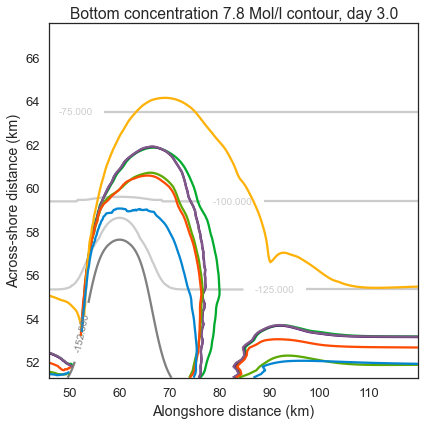

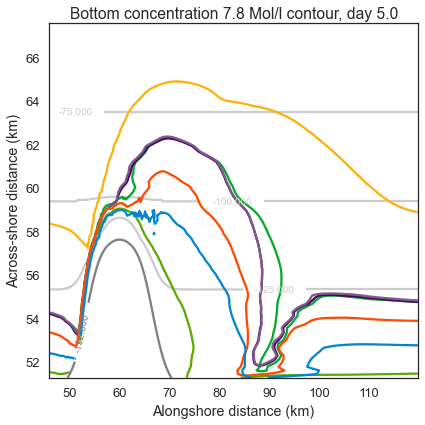

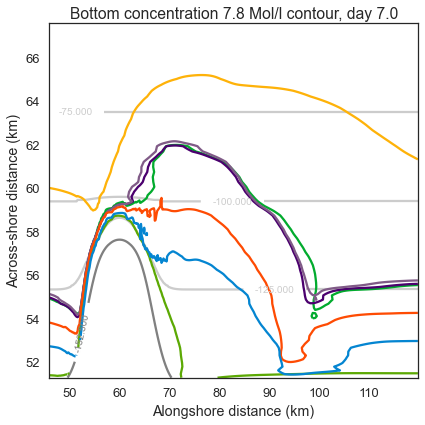

In [51]:
sns.set_context('talk', font_scale=1.0)

cc = [sns.xkcd_rgb["kelly green"],sns.xkcd_rgb["royal purple"],sns.xkcd_rgb["muted purple"],sns.xkcd_rgb["leaf green"],
     sns.xkcd_rgb["blood orange"],sns.xkcd_rgb["saffron"],sns.xkcd_rgb["cerulean"]]

for tt in [6,10,14]:
    
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 6),  sharey=True, sharex=True)
    
    cset = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       -bathy[225:300,100:],
                       [ rc[30],-125,-100,-75,-50],
                       colors=['0.5','0.80','0.80','0.80','0.80'],
                       linewidth=1, rstride=2, cstride=2,zdir='z',
                      )
    iso = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       Conc1Filt[tt,225:300,100:],
                       [7.8],colors=cc[0],label='Base case',
                      )
    iso = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       Conc3D06Filt[tt,225:300,100:],
                       [7.8],colors=cc[1],
                      )
    iso = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       Conc3D04Filt[tt,225:300,100:],
                       [7.8],colors=cc[2],
                      )
    iso = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       Conc12Filt[tt,225:300,100:],
                       [7.8],colors=cc[3],
                      )
    iso = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       Conc15Filt[tt,225:300,100:],
                       [7.8],colors=cc[4],
                      )
    iso = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       Conc16Filt[tt,225:300,100:],
                       [7.8],colors=cc[5],
                      )
    iso = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       Conc19Filt[tt,225:300,100:],
                       [7.8],colors=cc[6],
                      )
    
    
    ax1.clabel(cset, inline=1, fontsize=10)
    ax1.set_aspect('auto')
    ax1.set_title('Bottom concentration 7.8 Mol/l contour, day %0.1f' %(tt/2.0))
    ax1.set_ylabel('Across-shore distance (km)')
    ax1.set_xlabel('Alongshore distance (km)')
    ax1.legend(loc=0)
    
    plt.tight_layout()
    plt.show

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

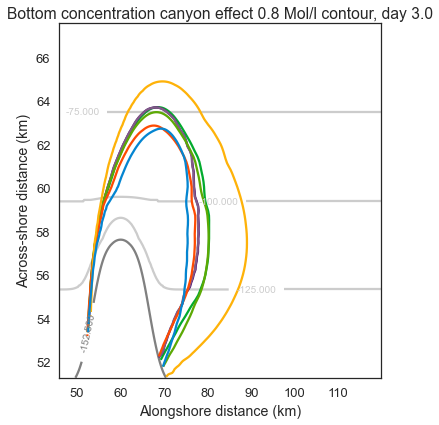

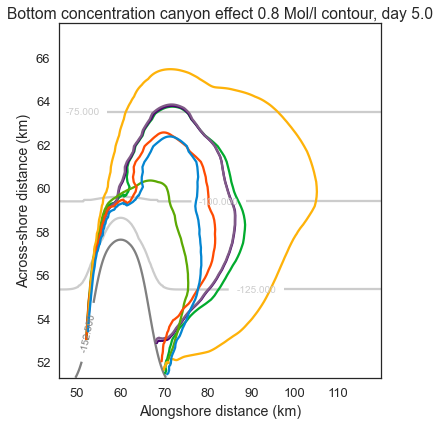

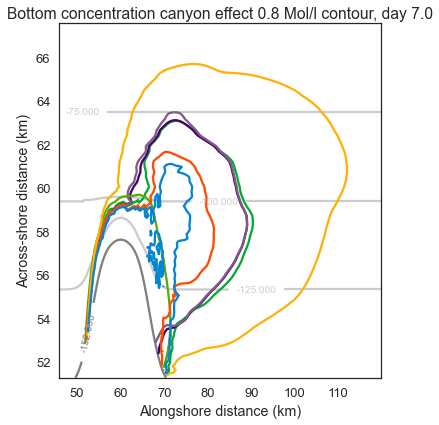

In [50]:
sns.set_context('talk', font_scale=1.0)

cc = [sns.xkcd_rgb["kelly green"],sns.xkcd_rgb["royal purple"],sns.xkcd_rgb["muted purple"],sns.xkcd_rgb["leaf green"],
     sns.xkcd_rgb["blood orange"],sns.xkcd_rgb["saffron"],sns.xkcd_rgb["cerulean"]]

for tt in [6,10,14]:
    
    fig, ax1 = plt.subplots(1, 1, figsize=(6, 6),  sharey=True, sharex=True)
    
    cset = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       -bathy[225:300,100:],
                       [ rc[30],-125,-100,-75,-50],
                       colors=['0.5','0.80','0.80','0.80','0.80'],
                       linewidth=1, rstride=2, cstride=2,zdir='z',
                      )
    
    iso = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       Conc1Filt[tt,225:300,100:]-Conc1FiltNoC[tt,225:300,100:],
                       [0.8],colors=cc[0],label='Base case',
                      )
    iso = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       Conc3D06Filt[tt,225:300,100:]-Conc1FiltNoC[tt,225:300,100:],
                       [0.8],colors=cc[1],
                      )
    iso = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       Conc3D04Filt[tt,225:300,100:]-Conc30Filt[tt,225:300,100:],
                       [0.8],colors=cc[2],
                      )
    iso = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       Conc12Filt[tt,225:300,100:]-Conc25Filt[tt,225:300,100:],
                       [0.8],colors=cc[3],
                      )
    iso = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       Conc15Filt[tt,225:300,100:]-Conc27Filt[tt,225:300,100:],
                       [0.8],colors=cc[4],
                      )
    iso = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       Conc16Filt[tt,225:300,100:]-Conc28Filt[tt,225:300,100:],
                       [0.8],colors=cc[5],
                      )
    iso = ax1.contour(xc[225:300,100:]/1000.0,yc[225:300,100:]/1000.0,
                       Conc19Filt[tt,225:300,100:]-Conc23Filt[tt,225:300,100:],
                       [0.8],colors=cc[6],
                      )
    
    
    ax1.clabel(cset, inline=1, fontsize=10)
    ax1.set_aspect('auto')
    ax1.set_title('Bottom concentration canyon effect 0.8 Mol/l contour, day %0.1f' %(tt/2.0))
    ax1.set_ylabel('Across-shore distance (km)')
    ax1.set_xlabel('Alongshore distance (km)')
    ax1.legend(loc=0)
    
    
    plt.tight_layout()
    plt.show

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')